# Lab 4 Project (Titanic)
Jason Ballard
4 April 2025

Import the external Python libraries used (e.g., pandas, numpy, matplotlib, seaborn, sklearn and more).

## Section 1. Import and Inspect the Data

In [38]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit


In [39]:
# Load Titanic dataset
df = sns.load_dataset('titanic')
print(df.head())
print(df.info())

features = list(df.columns)
print(features)
print(len(features))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [40]:
# titanic.info()
# print(titanic.head(10))
# titanic.isnull().sum()
# print(titanic.describe())
# print(titanic.corr(numeric_only=True))

# Section 2. Data Exploration and Preparation

In [41]:
# attributes = ['age', 'fare', 'pclass']
# scatter_matrix(titanic[attributes], figsize=(10, 10))

In [42]:
# plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
# plt.xlabel('Age')
# plt.ylabel('Fare')
# plt.title('Age vs Fare by Gender')
# plt.show()

In [43]:
# #Create a histogram of age:

# sns.histplot(titanic['age'], kde=True)
# plt.title('Age Distribution')
# plt.show()

In [44]:
# #Create a count plot for class and survival:

# sns.countplot(x='class', hue='survived', data=titanic)
# plt.title('Class Distribution by Survival')
# plt.show()

In [45]:
df['age'] = df['age'].fillna(df['age'].median())

df['survived'] = df['survived'].fillna(df['survived'].median())

titanic = df.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

<!-- ### Reflection 2.1:

1. What patterns or anomalies do you notice? Young to middle age passengers, majority found in third class
2. Do any features stand out as potential predictors? the deck location or fare price
3. Are there any visible class imbalances? There are huge class imbalances. Majority of the passengers where younger families traveling to the USA -->

## 2.1 Handle Missing Values and Clean Data

In [46]:
# Impute missing values in 'age' with the median age
df['age'].fillna(df['age'].median())

# Fill missing values in 'survived' with the median age
df['survived'].fillna(df['survived'].median())

# Impute missing values in 'fare' with the mode (most common value)
mode_val = df['fare'].mode()
if not mode_val.empty:
    df['fare'].fillna(mode_val[0])
else:
    print("No mode found for 'fare'")


## 2.2 Feature Engineering

In [47]:
# Create a new feature 'family_size' (sum of siblings/spouses and parents/children aboard)
df['family_size'] = df['sibsp'] + df['parch'] + 1  # +1 to include the passenger themselves

<!-- ### Reflection 2.3

1. Why might family size be a useful feature for predicting survival? famil;y size is a good prediction of survivalbility for the female and younger children of the families
2. Why convert categorical data to numeric?  the conversion allows computations to be run on the data. -->

# Section 3. Feature Selection and Justification

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Use 'Survived' as the target

First:
- input features: age
- target: fare

Second:
- input features - family size
- target: fare

Third:
- input features -  age, family_size
- target: fare

Fourth: 
- input feature - survived 
- target - fare


## 3.1 Choose features and target

In [48]:
# Select relevant features for classification
features = ['age', 'family_size', 'survived']
target = 'fare'

# Extract relevant columns
titanic_classification = df[features + [target]]

# Drop rows with missing values
titanic_classification = titanic_classification.dropna()

# Display the processed dataset
print(titanic_classification.head())

    age  family_size  survived     fare
0  22.0            2         0   7.2500
1  38.0            2         1  71.2833
2  26.0            1         1   7.9250
3  35.0            2         1  53.1000
4  35.0            1         0   8.0500


## 3.2 Define X (features) and y (target)
- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time

- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series

In [49]:
# Case 1 Assign input features to X = (alone)
X = df['age']
# Assign target variable to y (as applicable)
y = df['fare']

In [50]:
# Case 2 Assign input features to X = embarked
X = df['family_size']
# Assign target variable to y (as applicable)   
y = df['fare']

In [51]:
#  Case 3 Assign input features to X = 
X = df[['age', 'family_size']]
# Assign target variable to y (as applicable)
y = df['fare']

In [52]:
#  Case 4 Assign input features to X = 
X = df['survived']
# Assign target variable to y (as applicable)
y = df['fare']

### Reflection 3:

1. Why are these features selected? the features selected provide the most tell of survivability
2. Are there any features that are likely to be highly predictive of survival? Yes age and class

# Section 4. Train a Classification Model (Decision Tree)

## 4.1 Basic Train/Test split 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


## 4.2 Train/Test split

In [57]:
from sklearn.model_selection import train_test_split

cases = {
    "Case 1": df[['age']],
    "Case 2": df[['family_size']],
    "Case 3": df[['age', 'family_size']],
}

splits = {}

for name, X in cases.items():
    y = df['fare']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    splits[name] = (X_train, X_test, y_train, y_test)


In [58]:
for case, (X_train, X_test, y_train, y_test) in splits.items():
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\n{case} Performance")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("R²:", r2_score(y_test, preds))



Case 1 Performance
MAE: 25.28637293162364
R²: 0.0034163395508415295

Case 2 Performance
MAE: 25.02534815941641
R²: 0.022231186110131973

Case 3 Performance
MAE: 24.284935030470688
R²: 0.049784832763073106


## 4.3 Compare Results


Original Fare Distribution:
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64
Train Fare Distribution:
 count    712.000000
mean      32.388400
std       52.218079
min        0.000000
25%        7.895800
50%       13.500000
75%       30.070800
max      512.329200
Name: fare, dtype: float64
Test Fare Distribution:
 count    179.000000
mean      31.471556
std       38.143365
min        0.000000
25%        8.050000
50%       18.750000
75%       34.687500
max      247.520800
Name: fare, dtype: float64


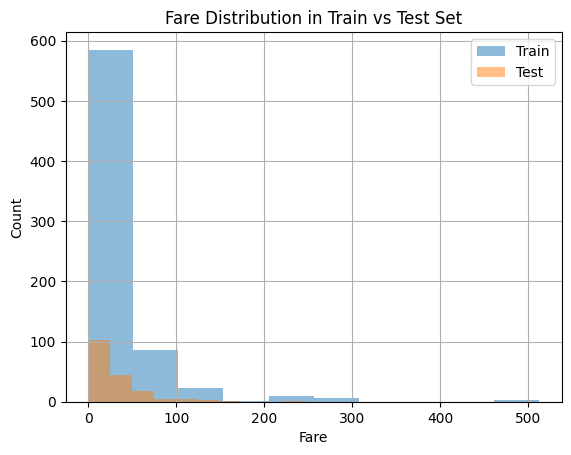

In [59]:
print("Original Fare Distribution:\n", y.describe())
print("Train Fare Distribution:\n", y_train.describe())
print("Test Fare Distribution:\n", y_test.describe())

y_train.hist(alpha=0.5, label='Train')
y_test.hist(alpha=0.5, label='Test')
plt.legend()
plt.title('Fare Distribution in Train vs Test Set')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

### Reflection 4:

1. Why might stratification improve model performance? this ensures that the data is equallly representivate across the whole data set. 
2. How close are the training and test distributions to the original dataset?
3. Which split method produced better class balance?

## Section 5. 